# Importing Packages

In [338]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pywt
import cv2 
%matplotlib inline

# Selecting a Single Image to See the Process Works Correctly

In [315]:
img = cv2.imread(r"test_images\test4.jpeg")
img.shape

(225, 225, 3)

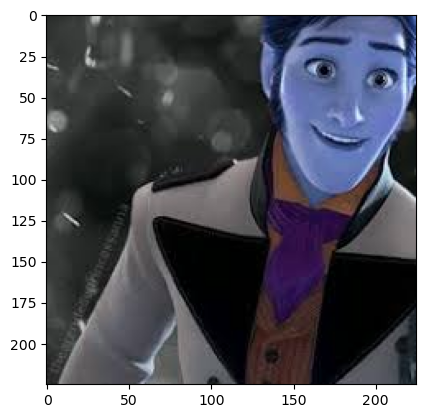

In [317]:
plt.imshow(img)

In [319]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(225, 225)

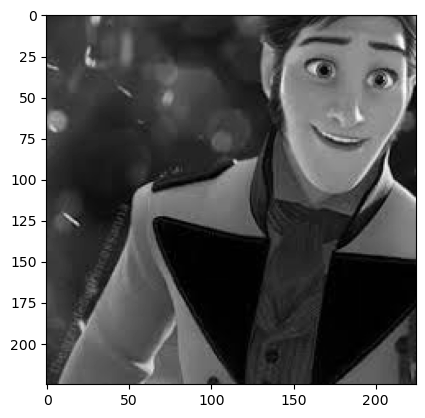

In [321]:
plt.imshow(gray, cmap = "gray")

Running detection...
Detection complete. Results: [{'box': [249, 0, 139, 186], 'confidence': 0.9887146353721619, 'keypoints': {'nose': [332, 111], 'mouth_right': [348, 136], 'right_eye': [363, 69], 'left_eye': [298, 60], 'mouth_left': [288, 126]}}]


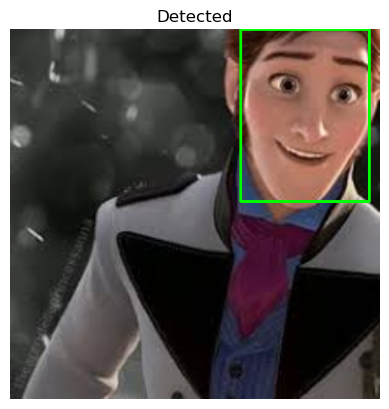

In [323]:
from mtcnn import MTCNN
import cv2

detector = MTCNN()

# Load a small test image (e.g., 400x400)
img = cv2.imread(r"test_images\test4.jpeg")
img = cv2.resize(img, (400, 400))  # Force small size for quick test
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Running detection...")
results = detector.detect_faces(img_rgb)
print("Detection complete. Results:", results)

# Loop through detections
for result in results:
    x, y, w, h = result['box']
    # Draw a bounding box
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detected")
plt.show()

## We want to only leave the face so that it is easier for training, as most of the pictures also contain unneccessary content that could mislead our models.

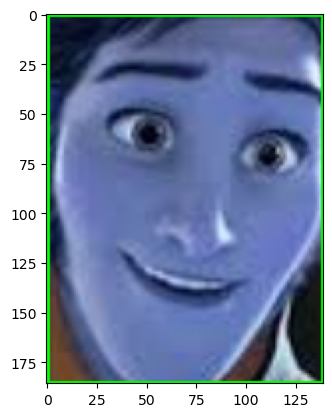

In [334]:
for result in results:
    x, y, w, h = result['box']
    # Draw a bounding box
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_color = face_img[y:y+h, x:x+w]

plt.imshow(roi_color, cmap = 'gray')

In [327]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to read image: {image_path}")
        return None
   # img = cv2.resize(img, (400, 400))  # Force small size for quick test
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print("Running detection...")
    results = detector.detect_faces(img_rgb)
    print("Detection complete. Results:", results)
    # Get the first detected face only
    if len(results) > 0:
        x, y, w, h = results[0]['box']
        # Ensure coordinates are within image bounds
        x, y = max(0, x), max(0, y)
        cropped = img[y:y+h, x:x+w]
        return cropped

In [329]:
cropped_image = get_cropped_image(r"test_images\test4.jpeg")

Running detection...
Detection complete. Results: [{'box': [143, 0, 77, 102], 'confidence': 0.9746860265731812, 'keypoints': {'nose': [186, 63], 'mouth_right': [196, 74], 'right_eye': [204, 40], 'left_eye': [169, 34], 'mouth_left': [162, 68]}}]


In [262]:
path_to_data = "./data/"
path_to_cr_data = "./data/cropped/"

In [264]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [266]:
img_dirs

['./data/cropped',
 './data/gatson',
 './data/lady_tremaine',
 './data/mother_gothel',
 './data/prince_hans',
 './data/shan_yu',
 './data/villan_of_shrek_prince_charming']

In [268]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [270]:
cropped_image_dirs = []
names_dict = {}
for img_dir in img_dirs: 
    count = 1
    name = img_dir.split('/')[-1]
    print(name)
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path.replace("\\", "/"))
        if roi_color is not None:
            cropped_folder = path_to_cr_data + name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating")

            cropped_file_name = name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/"+ cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            if name not in names_dict:
                names_dict[name] = []
            names_dict[name].append(cropped_file_path)
            count += 1
                

cropped
gatson
Running detection...
Detection complete. Results: []
Running detection...
Detection complete. Results: [{'box': [101, 23, 42, 54], 'confidence': 0.9876318573951721, 'keypoints': {'nose': [130, 59], 'mouth_right': [128, 68], 'right_eye': [137, 49], 'left_eye': [122, 43], 'mouth_left': [115, 62]}}]
generating
Running detection...
Detection complete. Results: []
Running detection...
Detection complete. Results: [{'box': [43, 34, 66, 86], 'confidence': 0.9313415288925171, 'keypoints': {'nose': [86, 89], 'mouth_right': [87, 101], 'right_eye': [100, 76], 'left_eye': [71, 68], 'mouth_left': [60, 95]}}]
Running detection...
Detection complete. Results: [{'box': [78, 17, 46, 62], 'confidence': 0.9991748929023743, 'keypoints': {'nose': [108, 57], 'mouth_right': [110, 68], 'right_eye': [117, 45], 'left_eye': [97, 41], 'mouth_left': [95, 65]}}]
Running detection...
Detection complete. Results: []
Running detection...
Detection complete. Results: [{'box': [102, 16, 44, 62], 'confiden

In [336]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

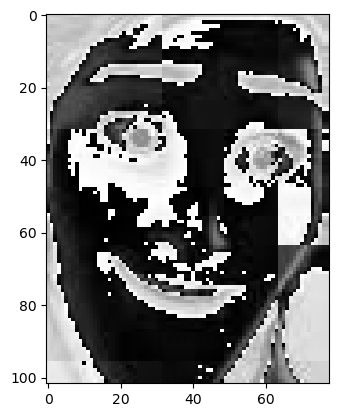

In [272]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap = 'gray')

In [273]:
class_dict = {}
count = 0
for name in names_dict.keys():
    class_dict[name] = count
    count += 1
class_dict

{'gatson': 0,
 'lady_tremaine': 1,
 'mother_gothel': 2,
 'prince_hans': 3,
 'shan_yu': 4,
 'villan_of_shrek_prince_charming': 5}

In [274]:
X= []
y = []
for name, files in names_dict.items():
    for image in files:
        img = cv2.imread(image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3, 1), scaled_img_har.reshape(32*32, 1)))
        X.append(combined_img)
        y.append(class_dict[name])

C:\ProgramData\anaconda3\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [280]:
len(X[0])

4096

In [282]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(159, 4096)

In [284]:
#Rebuilding our dictionary

names_dict = {}
for img_dir in cropped_image_dirs:
    name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    names_dict[name] = file_list
names_dict

{'gatson': ['./data/cropped/gatson\\gatson1.png',
  './data/cropped/gatson\\gatson10.png',
  './data/cropped/gatson\\gatson11.png',
  './data/cropped/gatson\\gatson12.png',
  './data/cropped/gatson\\gatson13.png',
  './data/cropped/gatson\\gatson14.png',
  './data/cropped/gatson\\gatson15.png',
  './data/cropped/gatson\\gatson16.png',
  './data/cropped/gatson\\gatson2.png',
  './data/cropped/gatson\\gatson3.png',
  './data/cropped/gatson\\gatson4.png',
  './data/cropped/gatson\\gatson5.png',
  './data/cropped/gatson\\gatson6.png',
  './data/cropped/gatson\\gatson7.png',
  './data/cropped/gatson\\gatson8.png',
  './data/cropped/gatson\\gatson9.png'],
 'lady_tremaine': ['./data/cropped/lady_tremaine\\lady_tremaine1.png',
  './data/cropped/lady_tremaine\\lady_tremaine10.png',
  './data/cropped/lady_tremaine\\lady_tremaine11.png',
  './data/cropped/lady_tremaine\\lady_tremaine12.png',
  './data/cropped/lady_tremaine\\lady_tremaine13.png',
  './data/cropped/lady_tremaine\\lady_tremaine14.pn

### Model Training

In [287]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.825

In [291]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      0.67      0.75         9
           2       0.69      1.00      0.82         9
           3       1.00      0.50      0.67         6
           4       0.00      0.00      0.00         0
           5       0.92      1.00      0.96        12

    accuracy                           0.82        40
   macro avg       0.75      0.65      0.68        40
weighted avg       0.88      0.82      0.83        40



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [293]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [295]:
 model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [297]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv = 5, return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
    'model': algo,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.806522,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.613406,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.815217,{'logisticregression__C': 1}


In [298]:
best_estimators['svm'].score(X_test, y_test)

0.85

In [301]:
best_estimators['random_forest'].score(X_test, y_test)

0.6

In [303]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.825

In [305]:
best_clf = best_estimators['svm']

Text(95.72222222222221, 0.5, 'Truth')

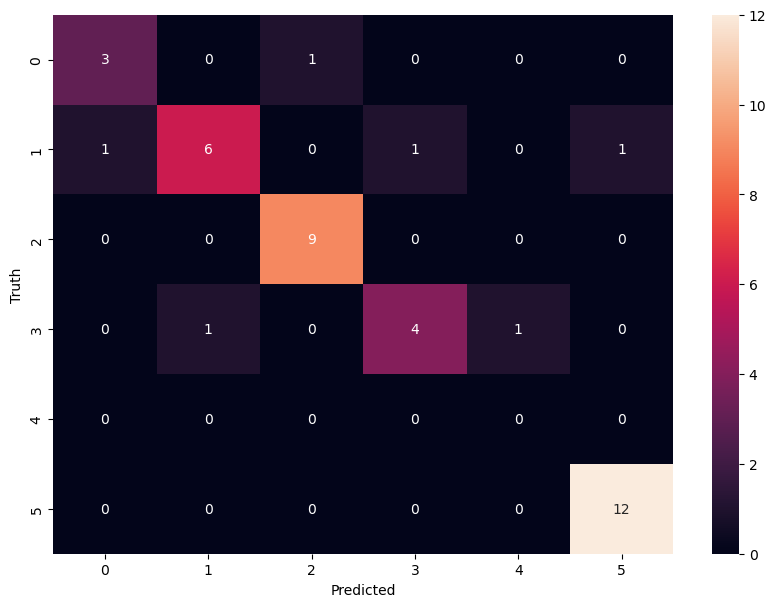

In [307]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y_test, best_clf.predict(X_test))
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot =True)
plt.xlabel ('Predicted')
plt.ylabel('Truth')

In [309]:
import joblib

joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [311]:
import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))